# We recommend to run this notebook on google colab

In [0]:
# import tensorflow as tf
# tf.test.gpu_device_name()
# Uncomment if run on google colab or with a GPU

'/device:GPU:0'

In [1]:
import pandas as pd
import requests
from io import StringIO

url = requests.get('https://drive.google.com/u/0/uc?id=1djg8oCXZNr25LQ4YrUa7x_om29wA7Wbj&export=download')
csv_raw = StringIO(url.text)
df = pd.read_csv(csv_raw)

In [3]:
len(df)

413778

In [0]:
# from google.colab import files
# uploaded = files.upload()

Saving processed_reviews.csv to processed_reviews.csv


In [0]:
# import pandas as pd
# import io
# df = pd.read_csv(io.BytesIO(uploaded['processed_reviews.csv']))

In [4]:
df.head()

,Label,Cleaned_reviews
0,1,i feel so lucky to have found this used phone ...
1,1,nice phone nice up grade from my pantach revue...
2,1,very pleased
3,1,it works good but it goes slow sometimes but i...
4,1,great phone to replace my lost phone the only ...


In [5]:
df = df.dropna()
len(df)

413256

In [6]:
count = 0
for id in df['Label']:
  if id==0:
    count +=1
count

31753

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(df['Cleaned_reviews'].values,df['Label'].values,test_size=0.20,shuffle=False)

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 50000)
tokenizer.fit_on_texts(X_train)

In [0]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'it': 3, 'and': 4, 'phone': 5, 'a': 6, 'to': 7, 'is': 8, 'this': 9, 'for': 10, 'my': 11, 'of': 12, 'with': 13, 'not': 14, 'was': 15, 'in': 16, 'that': 17, 't': 18, 'but': 19, 'on': 20, 'you': 21, 'have': 22, 'great': 23, 's': 24, 'good': 25, 'as': 26, 'very': 27, 'so': 28, 'had': 29, 'one': 30, 'no': 31, 'all': 32, 'be': 33, 'can': 34, 'at': 35, 'like': 36, 'screen': 37, 'me': 38, 'just': 39, 'use': 40, 'if': 41, 'battery': 42, 'from': 43, 'or': 44, 'has': 45, 'are': 46, 'an': 47, 'works': 48, 'would': 49, 'when': 50, 'get': 51, 'only': 52, 'love': 53, 'will': 54, 'new': 55, 'work': 56, 'up': 57, 'they': 58, 'price': 59, 'out': 60, 'than': 61, 'time': 62, 'really': 63, 'camera': 64, 'about': 65, 'product': 66, 'do': 67, 'its': 68, 'well': 69, 'am': 70, 'sim': 71, 'iphone': 72, 'what': 73, 'bought': 74, 'phones': 75, 'after': 76, 'because': 77, 'm': 78, 'card': 79, 'there': 80, 'more': 81, 'don': 82, 'buy': 83, 'got': 84, 'even': 85, 'other': 86, 'now': 87, 'back': 88

In [0]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

In [0]:
import keras.preprocessing
max_review_length = 100
X_train_pad = keras.preprocessing.sequence.pad_sequences(X_train_tok, maxlen=max_review_length)
X_test_pad = keras.preprocessing.sequence.pad_sequences(X_test_tok, maxlen=max_review_length)

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
Y_train = to_categorical(Y_train)
Y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [0]:
encoder = LabelEncoder()
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)
Y_test = to_categorical(Y_test)
Y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [0]:
import keras.backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras import regularizers
embedding_vector_length = 100
top_words = 50000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(units=64,dropout=0.4,recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,recurrent_dropout=0.4))
# model.add(LSTM(units=32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01)))
# model.add(LSTM(units=32,dropout=0.2,recurrent_dropout=0.2,kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy',precision_m, recall_m])
print(model.summary())

# ,kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          5000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 64)           42240     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 5,075,459
Trainable params: 5,075,459
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model.fit(X_train_pad, Y_train, epochs=5, batch_size=512,validation_data=(X_test_pad,Y_test))
# Final evaluation of the model on test data
scores = model.evaluate(X_test_pad, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 330604 samples, validate on 82652 samples
Epoch 1/5
330604/330604 [==============================] - 233s 704us/step - loss: 0.4430 - accuracy: 0.8414 - precision_m: 0.8487 - recall_m: 0.7969 - val_loss: 0.3751 - val_accuracy: 0.8666 - val_precision_m: 0.8526 - val_recall_m: 0.8349
Epoch 2/5
330604/330604 [==============================] - 231s 700us/step - loss: 0.3433 - accuracy: 0.8776 - precision_m: 0.8566 - recall_m: 0.8651 - val_loss: 0.3578 - val_accuracy: 0.8725 - val_precision_m: 0.8525 - val_recall_m: 0.8642
Epoch 3/5
330604/330604 [==============================] - 231s 699us/step - loss: 0.3175 - accuracy: 0.8858 - precision_m: 0.8691 - recall_m: 0.8839 - val_loss: 0.3557 - val_accuracy: 0.8740 - val_precision_m: 0.8660 - val_recall_m: 0.8668
Epoch 4/5
330604/330604 [==============================] - 230s 696us/step - loss: 0.3022 - accuracy: 0.8920 - precision_m: 0.8905 - recall_m: 0.8811 - val_loss: 0.3499 - val_accuracy: 0.8738 - val_precision_m: 0.8766 - val_re

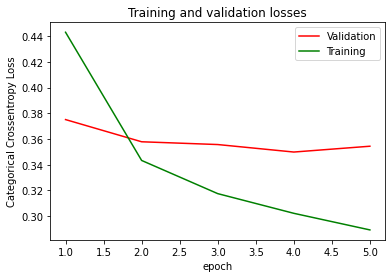

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,5+1))
val_loss = history.history['val_loss']
train_loss = history.history['loss']
lab1, =plt.plot(x,val_loss, color='red')
lab2, =plt.plot(x,train_loss,color='green')
plt.title('Training and validation losses')
plt.legend([lab1,lab2],['Validation', 'Training'], loc='best')

In [0]:
import numpy as np
test_pred = model.predict(X_test_pad, batch_size=512)
from sklearn.metrics import confusion_matrix
test_label=np.argmax(test_pred,axis=1)
confusion_matrix(np.argmax(Y_test,axis=1),test_label)

array([[16267,   503,  1740],
       [ 2565,   951,  2582],
       [ 1937,   806, 55301]])